In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r"C:\Users\shres\Desktop\PBL PROJECT\Cleaning\gurgaon_properties_cleaned_v1.csv")

In [4]:
df.duplicated().sum()

122

In [ ]:
df.head(1)
# focus-> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ansal housing highland park,sector 103,0.8,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up area: 1089 sq.ft. (101.17 sq.m.)Carpet area: 705 sq.ft. (65.5 sq.m.),2.0,2.0,3,pooja room,3.0,East,0 to 1 Year Old,"['State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Chirag Hospital Pvt. Ltd', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Sneh Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']","['4 Fan', '4 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2365,0.65,1050.0,Carpet area: 1050 (97.55 sq.m.)
632,4.75,4500.0,Built Up area: 4500 (418.06 sq.m.)
1396,1.70,2160.0,Plot area 240(200.67 sq.m.)
1312,1.35,1300.0,Super Built up area 1300(120.77 sq.m.)Built Up area: 1275 sq.ft. (118.45 sq.m.)Carpet area: 1250 sq.ft. (116.13 sq.m.)
2692,1.10,2542.0,Carpet area: 2542 (236.16 sq.m.)


In [7]:
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [10]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639
    return area_value

In [11]:
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [77]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1147,3.80,flat,2164.0,Super Built up area 2164(201.04 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),2164.0,1700.0,1600.0
2567,1.75,flat,2200.0,Super Built up area 2200(204.39 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),2200.0,2100.0,2000.0
660,2.00,flat,2779.0,Super Built up area 2779(258.18 sq.m.)Built Up area: 2500 sq.ft. (232.26 sq.m.)Carpet area: 2300 sq.ft. (213.68 sq.m.),2779.0,2500.0,2300.0
1320,1.15,flat,1790.0,Super Built up area 1790(166.3 sq.m.),1790.0,NaN,NaN
2371,0.70,house,1053.0,Built Up area: 117 (97.83 sq.m.),NaN,117.0,NaN


In [13]:
df.duplicated().sum()

122

In [79]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(534, 7)

In [15]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
6,7.25,house,2471.0,Plot area 303(253.35 sq.m.),NaN,NaN,NaN
9,4.95,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
10,1.83,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
19,4.65,house,2646.0,Plot area 294(245.82 sq.m.),NaN,NaN,NaN
21,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN


In [16]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [17]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [18]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
6,7.25,house,2471.0,Plot area 303(253.35 sq.m.),NaN,NaN,NaN
9,4.95,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
10,1.83,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
19,4.65,house,2646.0,Plot area 294(245.82 sq.m.),NaN,NaN,NaN
21,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN


In [19]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [20]:
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [21]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [80]:
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2204,19.50,house,8775.0,Plot area 975(815.22 sq.m.),NaN,975.0,NaN
773,12.39,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
3637,5.60,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.0,NaN
2484,1.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.0,NaN
692,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.0,NaN


In [81]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [82]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [83]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
6,7.25,house,2471.0,Plot area 303(253.35 sq.m.),NaN,303.00,NaN
9,4.95,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
10,1.83,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
19,4.65,house,2646.0,Plot area 294(245.82 sq.m.),NaN,2646.00,NaN
21,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
22,5.00,house,1467.0,Plot area 163(136.29 sq.m.),NaN,1467.00,NaN
30,11.50,house,2736.0,Plot area 304(254.18 sq.m.),NaN,2736.00,NaN
42,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
51,5.50,house,2385.0,Plot area 265(221.57 sq.m.),NaN,2385.00,NaN
53,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN


In [89]:
df.update(all_nan_df)

In [90]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [91]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up area: 1089 sq.ft. (101.17 sq.m.)Carpet area: 705 sq.ft. (65.5 sq.m.),2.0,2.0,3,3.0,East,New Property,1361.0,1089.0,705.0,0,0,0,1,0,0,174
1,flat,ramprastha skyz,sector 37d,1.10,6376.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,7.0,East,Undefined,1725.0,NaN,NaN,0,0,0,0,0,0,109
2,flat,signature global solera,sector 107,0.28,5725.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,6.0,West,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45
3,flat,corona optus,sector 37c,1.20,6916.0,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up area: 1635 sq.ft. (151.9 sq.m.)Carpet area: 1535 sq.ft. (142.61 sq.m.),3.0,4.0,3,8.0,South-West,Relatively New,1735.0,1635.0,1535.0,0,0,0,0,0,0,149
4,flat,puri emerald bay,sector 104,2.30,9387.0,2450.0,Super Built up area 2450(227.61 sq.m.),3.0,4.0,3+,10.0,North-East,Moderately Old,2450.0,NaN,NaN,0,1,0,0,0,0,101


2.additionalRoom

In [27]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [29]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]


,additionalRoom,study room,servant room,store room,pooja room,others
2408,not available,0,0,0,0,0
1392,"pooja room,study room,servant room",1,1,0,1,0
308,"pooja room,study room,servant room",1,1,0,1,0
3668,others,0,0,0,0,1
3706,"pooja room,study room,servant room,others",1,1,0,1,1


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up area: 1089 sq.ft. (101.17 sq.m.)Carpet area: 705 sq.ft. (65.5 sq.m.),2.0,2.0,3,pooja room,3.0,East,0 to 1 Year Old,"['State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Chirag Hospital Pvt. Ltd', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Sneh Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']","['4 Fan', '4 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1361.0,1089.0,705.0,0,0,0,1,0
1,flat,ramprastha skyz,sector 37d,1.10,6376.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,not available,7.0,East,Jan-24,"['Shri Balaji Hospital and Trauma Center', 'Kamla Hospital Gurgaon', 'Shri Multispeciality Hospital', 'Boxer Fuel Point', 'Basai dhankot railway station']",[],"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1725.0,NaN,NaN,0,0,0,0,0
2,flat,signature global solera,sector 107,0.28,5725.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,not available,6.0,West,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'Dwarka Expressway', ""Colonel's Central Academy"", 'The NorthCap University', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Trident Hotel Gurgaon', 'Fun N Food Village', 'DLF Golf and Country Club', 'F9 Go Karting Gurgaon', 'SkyJumper Trampoline Park Gurgaon']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Waste Disposal']",NaN,NaN,489.0,0,0,0,0,0
3,flat,corona optus,sector 37c,1.20,6916.0,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up area: 1635 sq.ft. (151.9 sq.m.)Carpet area: 1535 sq.ft. (142.61 sq.m.),3.0,4.0,3,not available,8.0,South-West,1 to 5 Year Old,"['The Esplanade Mall', 'Gurugram Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Gurugram University', 'Medanta The Medicity', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Kadipur Industrial Area', 'Holiday Inn Gurugram Sector 90', 'Tau DeviLal Sports Complex', 'Heritage badminton academy', 'SkyJumper Trampoline Park']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s

3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Jan-24                   7
Dec-25                   7
Oct-24                   7
Aug-23                   7
Jun-24                   5
Nov-23                   5
Aug-24                   4
By 2025                  4
Jul-24                   4
Sep-23                   4
Feb-24                   3
May-24                   3
Nov-24                   3
Oct-23                   3
Jan-25                   3
Jun 2024                 2
Apr-26                   2
Jan-26                   2
Dec 2023                 2
Aug-25                   2
Jul-27                   2
Jul-25                   2
Mar-25                   2
Sep-25        

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:

df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              476
Old Property           310
Under Construction     140
Name: count, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up area: 1089 sq.ft. (101.17 sq.m.)Carpet area: 705 sq.ft. (65.5 sq.m.),2.0,2.0,3,pooja room,3.0,East,New Property,"['State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Chirag Hospital Pvt. Ltd', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Sneh Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']","['4 Fan', '4 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1361.0,1089.0,705.0,0,0,0,1,0
1,flat,ramprastha skyz,sector 37d,1.10,6376.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,not available,7.0,East,Undefined,"['Shri Balaji Hospital and Trauma Center', 'Kamla Hospital Gurgaon', 'Shri Multispeciality Hospital', 'Boxer Fuel Point', 'Basai dhankot railway station']",[],"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1725.0,NaN,NaN,0,0,0,0,0
2,flat,signature global solera,sector 107,0.28,5725.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,not available,6.0,West,Relatively New,"['Gurgaon Dreamz Mall', 'Dwarka Expressway', ""Colonel's Central Academy"", 'The NorthCap University', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Trident Hotel Gurgaon', 'Fun N Food Village', 'DLF Golf and Country Club', 'F9 Go Karting Gurgaon', 'SkyJumper Trampoline Park Gurgaon']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Waste Disposal']",NaN,NaN,489.0,0,0,0,0,0
3,flat,corona optus,sector 37c,1.20,6916.0,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up area: 1635 sq.ft. (151.9 sq.m.)Carpet area: 1535 sq.ft. (142.61 sq.m.),3.0,4.0,3,not available,8.0,South-West,Relatively New,"['The Esplanade Mall', 'Gurugram Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Gurugram University', 'Medanta The Medicity', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Kadipur Industrial Area', 'Holiday Inn Gurugram Sector 90', 'Tau DeviLal Sports Complex', 'Heritage badminton academy', 'SkyJumper Trampoline Park']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)'

4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1558,"['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '11 Light', '1 Chimney', '1 Curtains', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1710,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
2009,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1731,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Curtains', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1310,"['1 Water Purifier', '2 Fan', '1 Fridge', '1 Geyser', '8 Light', '1 AC', '8 Curtains', '1 Modular Kitchen', '1 Wardrobe', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [39]:
import re

all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(rf"(\d+) {furnishing}")  # Fixed raw string for regex
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [40]:
furnishings_df.shape

(3803, 19)

In [43]:
furnishings_df = df[['furnishDetails'] + columns_to_include].copy()  # Ensures an independent copy
furnishings_df.drop(columns=['furnishDetails'], inplace=True)


In [44]:
furnishings_df.sample(5)

,Wardrobe,Curtains,TV,Bed,Fridge,Exhaust Fan,AC,Dining Table,Stove,Washing Machine,Geyser,Sofa,Modular Kitchen,Fan,Water Purifier,Microwave,Light,Chimney
2808,6,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1
3264,3,0,0,0,0,1,0,0,0,0,3,0,1,7,1,0,15,0
286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2587,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
1960,5,0,0,0,0,1,0,0,0,0,5,0,0,6,0,0,15,1


In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [47]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

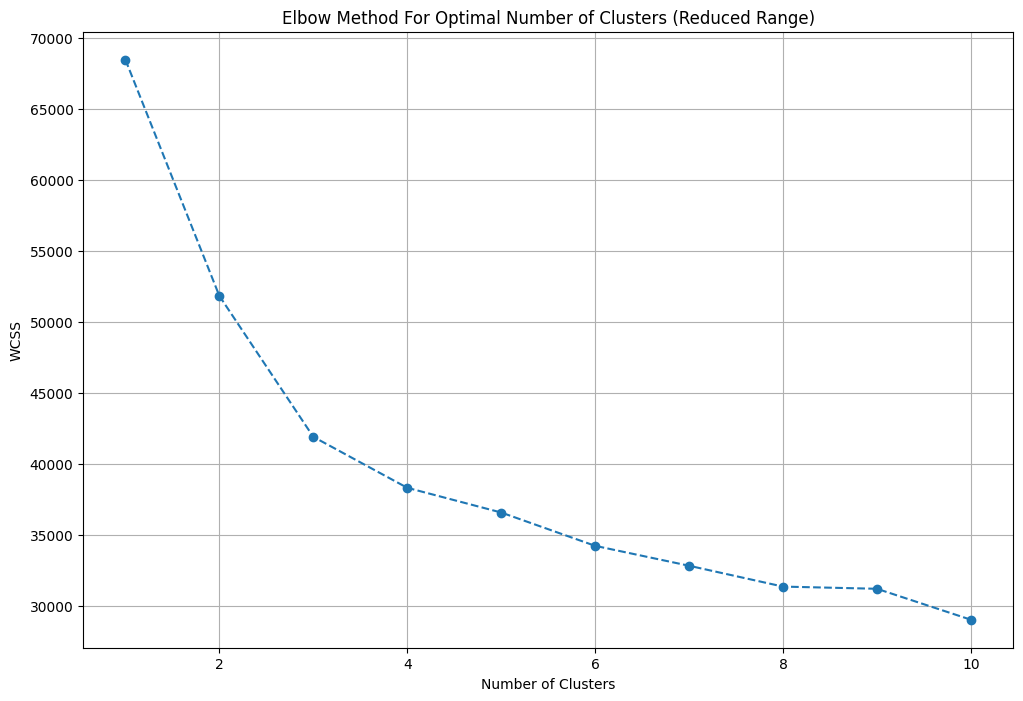

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [50]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

cluster_assignments = kmeans.predict(scaled_data)

In [51]:
df = df.iloc[:,:-18]

In [52]:
df['furnishing_type'] = cluster_assignments

In [92]:
df.sample(5)[['furnishDetails','furnishing_type']]

KeyError: "['furnishDetails'] not in index"

5.features

In [54]:
df[['society','features']].sample(5)

,society,features
2377,shree vardhman victoria,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1151,hector trimurti heights,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2663,m3m woodshire,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
2361,the lions cghs,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1429,vasant appartments,"['Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors']"


In [55]:
df['features'].isnull().sum()

635

In [57]:
import pandas as pd
app_df = pd.read_csv(r"C:\Users\shres\Desktop\PBL PROJECT\Data\appartments.csv")
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [58]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [59]:
temp_df = df[df['features'].isnull()]

In [60]:
temp_df.shape

(635, 26)

In [61]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']


In [62]:
df.loc[temp_df.index,'features'] = x.values


In [63]:
df['features'].isnull().sum()


481

In [64]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [65]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [66]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2792,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3520,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
features_binary_df.shape

(3803, 130)

In [68]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

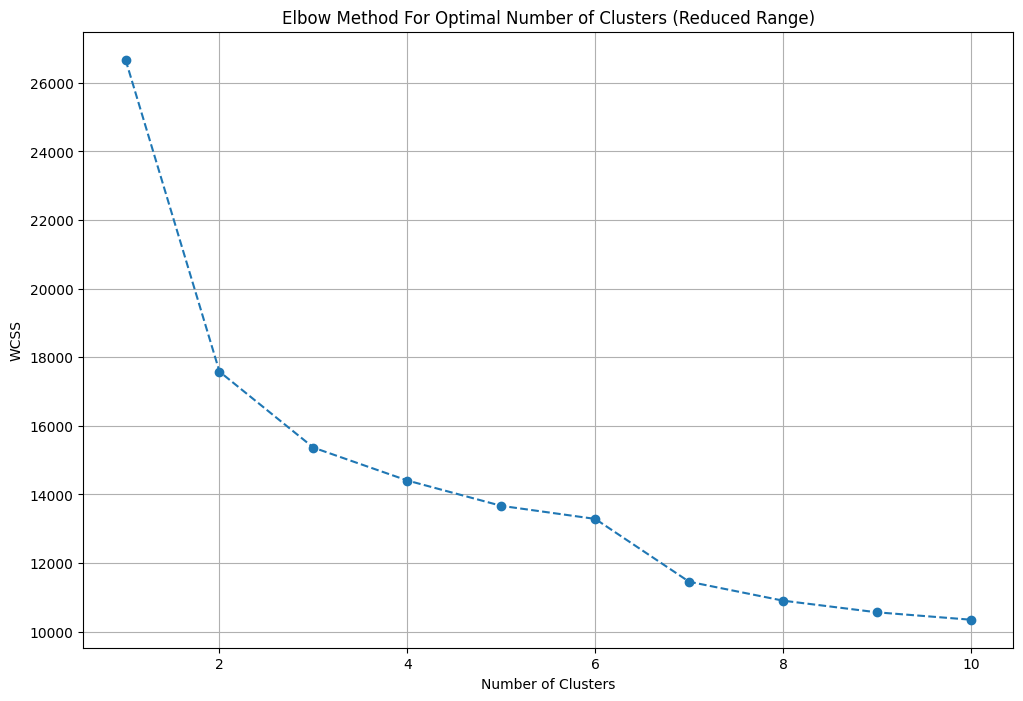

In [69]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [70]:
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [71]:
df['luxury_score'] = luxury_score

In [72]:

df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up area: 1089 sq.ft. (101.17 sq.m.)Carpet area: 705 sq.ft. (65.5 sq.m.),2.0,2.0,3,pooja room,3.0,East,New Property,"['State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Chirag Hospital Pvt. Ltd', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Sneh Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']","['4 Fan', '4 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1361.0,1089.0,705.0,0,0,0,1,0,0,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
1,flat,ramprastha skyz,sector 37d,1.10,6376.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,not available,7.0,East,Undefined,"['Shri Balaji Hospital and Trauma Center', 'Kamla Hospital Gurgaon', 'Shri Multispeciality Hospital', 'Boxer Fuel Point', 'Basai dhankot railway station']",[],"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1725.0,NaN,NaN,0,0,0,0,0,0,"[Security / Fire Alarm, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Piped-gas, Swimming Pool, Park, Security Personnel, Internet/wi-fi connectivity, Spacious Interiors, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",109
2,flat,signature global solera,sector 107,0.28,5725.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,not available,6.0,West,Relatively New,"['Gurgaon Dreamz Mall', 'Dwarka Expressway', ""Colonel's Central Academy"", 'The NorthCap University', 'Chirag Hospital', 'Indira Gandh

In [73]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)


In [74]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3613,flat,dlf regal gardens,sector 90,1.24,7065.0,1755.0,Super Built up area 1755(163.04 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3.0,3.0,3+,9.0,South,Relatively New,1755.0,1600.0,1400.0,0,0,0,0,1,0,72
3584,flat,m3m capital,sector 113,2.51,14800.0,1696.0,Super Built up area 1695(157.47 sq.m.),3.0,3.0,3+,2.0,North-West,Undefined,1695.0,NaN,NaN,1,0,0,0,0,0,49
2962,house,sector 14 rwa,sector 14,6.50,26000.0,2500.0,Plot area 2500(232.26 sq.m.),5.0,5.0,0,4.0,NaN,Moderately Old,NaN,2500.0,NaN,0,0,0,0,0,0,0
3411,house,independent,sector 7,2.25,15625.0,1440.0,Plot area 160(133.78 sq.m.),3.0,3.0,2,2.0,North-West,Old Property,NaN,160.0,NaN,0,0,0,0,0,1,27
1775,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 sq.yards (135.45 sq.m.)Carpet area: 160 sq.yards (133.78 sq.m.),8.0,8.0,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,1,94


In [75]:
df.shape

(3803, 23)

In [87]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)

In [88]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ansal housing highland park,sector 103,0.80,5878.0,1361.0,Super Built up area 1361(126.44 sq.m.)Built Up area: 1089 sq.ft. (101.17 sq.m.)Carpet area: 705 sq.ft. (65.5 sq.m.),2.0,2.0,3,3.0,East,New Property,1361.0,1089.0,705.0,0,0,0,1,0,0,174
1,flat,ramprastha skyz,sector 37d,1.10,6376.0,1725.0,Super Built up area 1725(160.26 sq.m.),3.0,3.0,3+,7.0,East,Undefined,1725.0,NaN,NaN,0,0,0,0,0,0,109
2,flat,signature global solera,sector 107,0.28,5725.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,6.0,West,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45
3,flat,corona optus,sector 37c,1.20,6916.0,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up area: 1635 sq.ft. (151.9 sq.m.)Carpet area: 1535 sq.ft. (142.61 sq.m.),3.0,4.0,3,8.0,South-West,Relatively New,1735.0,1635.0,1535.0,0,0,0,0,0,0,149
4,flat,puri emerald bay,sector 104,2.30,9387.0,2450.0,Super Built up area 2450(227.61 sq.m.),3.0,4.0,3+,10.0,North-East,Moderately Old,2450.0,NaN,NaN,0,1,0,0,0,0,101
